In [1]:
import requests
import pandas as pd
import numpy as np
from sklearn.cross_decomposition import CCA
from statsmodels.multivariate import cancorr
from statsmodels.multivariate.manova import MANOVA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
# import pyrcca
# import scipy.stats.mstats as mstats

In [2]:
url = r'https://online.stat.psu.edu/onlinecourses/sites/stat505/files/data/sales.txt'
response = requests.get(url)
file = r'sales.txt'
with open(file, 'wb') as f:
    f.write(response.content)

In [3]:
column = ['Sales Growth','Sales Profitability','New Account Sales','Creativity','Mechanical Reasoning','Abstract Reasoning','Mathematics']          
with open(file,'rb') as f:
    data = f.read()
data = data.decode('UTF-8').split('\r\n')

In [4]:
temp = []
for jj in data:
    tempo = []
    for ii in jj.split(' '):
        if len(ii):
            ii = int(float(ii)) if int(float(ii)) == float(ii) else float(ii)
            tempo.append(ii)
    temp.append(tempo)

In [5]:
df = pd.DataFrame(temp,columns=column)
df = df.dropna()
df.head()

,Sales Growth,Sales Profitability,New Account Sales,Creativity,Mechanical Reasoning,Abstract Reasoning,Mathematics
0,93.0,96.0,97.8,9.0,12.0,9.0,20.0
1,88.8,91.8,96.8,7.0,10.0,10.0,15.0
2,95.0,100.3,99.0,8.0,12.0,9.0,26.0
3,101.3,103.8,106.8,13.0,14.0,12.0,29.0
4,102.0,107.8,103.0,10.0,15.0,12.0,32.0


In [6]:
df.tail()

,Sales Growth,Sales Profitability,New Account Sales,Creativity,Mechanical Reasoning,Abstract Reasoning,Mathematics
45,103.5,112.0,110.8,18.0,13.0,12.0,37.0
46,89.5,96.0,97.3,7.0,15.0,11.0,14.0
47,84.3,89.8,94.3,8.0,8.0,8.0,9.0
48,104.3,109.5,106.5,14.0,12.0,12.0,36.0
49,106.0,118.5,105.0,12.0,16.0,11.0,39.0


In [7]:
Xdf = df[df.columns[:3]]
Xdf.head()

,Sales Growth,Sales Profitability,New Account Sales
0,93.0,96.0,97.8
1,88.8,91.8,96.8
2,95.0,100.3,99.0
3,101.3,103.8,106.8
4,102.0,107.8,103.0


In [8]:
Ydf = df[df.columns[3:]]
Ydf.head()

,Creativity,Mechanical Reasoning,Abstract Reasoning,Mathematics
0,9.0,12.0,9.0,20.0
1,7.0,10.0,10.0,15.0
2,8.0,12.0,9.0,26.0
3,13.0,14.0,12.0,29.0
4,10.0,15.0,12.0,32.0


In [9]:
Xdf_n = (Xdf-Xdf.mean())/(Xdf.std())
Xdf_n.head()

,Sales Growth,Sales Profitability,New Account Sales
0,-0.795383,-1.049157,-1.063194
1,-1.367797,-1.464000,-1.275408
2,-0.522805,-0.624437,-0.808536
3,0.335816,-0.278735,0.846735
4,0.431219,0.116354,0.040321


In [10]:
Ydf_n = (Ydf-Ydf.mean())/(Ydf.std())
Ydf_n.head()

,Creativity,Mechanical Reasoning,Abstract Reasoning,Mathematics
0,-0.562004,-0.644060,-0.729103,-0.926198
1,-1.068314,-1.234940,-0.261729,-1.400684
2,-0.815159,-0.644060,-0.729103,-0.356814
3,0.450616,-0.053179,0.673018,-0.072122
4,-0.308849,0.242261,0.673018,0.212570


In [11]:
model = CCA(n_components=3)
model.fit(Xdf_n,Ydf_n)
X_c, Y_c = model.transform(Xdf_n,Ydf_n)

In [12]:
dataCCA = {
    'CCAX1':X_c[:,0],
    'CCAX2':X_c[:,1],
    'CCAX3':X_c[:,2],
    'CCAY1':Y_c[:,0],
    'CCAY2':Y_c[:,1],
    'CCAY3':Y_c[:,2],
}
dfCCA = pd.DataFrame(dataCCA)
dfCCA.head()

,CCAX1,CCAX2,CCAX3,CCAY1,CCAY2,CCAY3
0,-1.564050,-0.126088,-0.258003,-1.300810,0.057473,0.073860
1,-2.248601,-0.142776,-0.016859,-1.867894,-0.467861,-0.381901
2,-1.071002,0.015345,-0.210480,-0.891390,0.427240,-0.075112
3,0.653156,-0.716058,0.097064,0.267683,-0.702360,0.043591
4,0.379167,-0.107791,-0.314408,0.280126,-0.098625,-0.663571


In [13]:
def plotHeat(corr,size=8):
    plt.figure(figsize=[size,size])
    mask = np.triu(np.ones_like(corr,dtype=bool))
    sns.heatmap(corr.round(3),cmap="coolwarm",annot=True,fmt='.1g',mask=mask,square=True)
    plt.show()

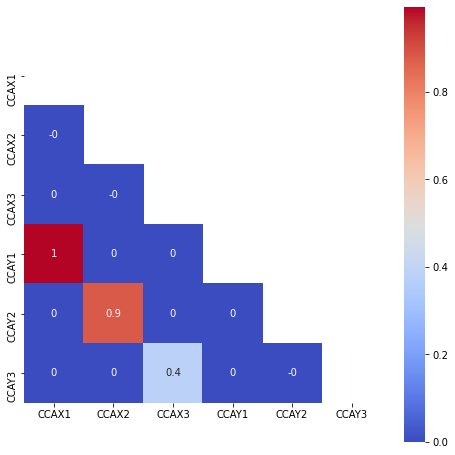

In [14]:
corrCCA = dfCCA.corr()
plotHeat(corrCCA)

In [15]:
dfCCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CCAX1   50 non-null     float64
 1   CCAX2   50 non-null     float64
 2   CCAX3   50 non-null     float64
 3   CCAY1   50 non-null     float64
 4   CCAY2   50 non-null     float64
 5   CCAY3   50 non-null     float64
dtypes: float64(6)
memory usage: 2.5 KB


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sales Growth          50 non-null     float64
 1   Sales Profitability   50 non-null     float64
 2   New Account Sales     50 non-null     float64
 3   Creativity            50 non-null     float64
 4   Mechanical Reasoning  50 non-null     float64
 5   Abstract Reasoning    50 non-null     float64
 6   Mathematics           50 non-null     float64
dtypes: float64(7)
memory usage: 3.1 KB


In [17]:
result = pd.concat([df, dfCCA], axis=1, join='inner')
result.head()

,Sales Growth,Sales Profitability,New Account Sales,Creativity,Mechanical Reasoning,Abstract Reasoning,Mathematics,CCAX1,CCAX2,CCAX3,CCAY1,CCAY2,CCAY3
0,93.0,96.0,97.8,9.0,12.0,9.0,20.0,-1.564050,-0.126088,-0.258003,-1.300810,0.057473,0.073860
1,88.8,91.8,96.8,7.0,10.0,10.0,15.0,-2.248601,-0.142776,-0.016859,-1.867894,-0.467861,-0.381901
2,95.0,100.3,99.0,8.0,12.0,9.0,26.0,-1.071002,0.015345,-0.210480,-0.891390,0.427240,-0.075112
3,101.3,103.8,106.8,13.0,14.0,12.0,29.0,0.653156,-0.716058,0.097064,0.267683,-0.702360,0.043591
4,102.0,107.8,103.0,10.0,15.0,12.0,32.0,0.379167,-0.107791,-0.314408,0.280126,-0.098625,-0.663571


In [18]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sales Growth          50 non-null     float64
 1   Sales Profitability   50 non-null     float64
 2   New Account Sales     50 non-null     float64
 3   Creativity            50 non-null     float64
 4   Mechanical Reasoning  50 non-null     float64
 5   Abstract Reasoning    50 non-null     float64
 6   Mathematics           50 non-null     float64
 7   CCAX1                 50 non-null     float64
 8   CCAX2                 50 non-null     float64
 9   CCAX3                 50 non-null     float64
 10  CCAY1                 50 non-null     float64
 11  CCAY2                 50 non-null     float64
 12  CCAY3                 50 non-null     float64
dtypes: float64(13)
memory usage: 7.5 KB


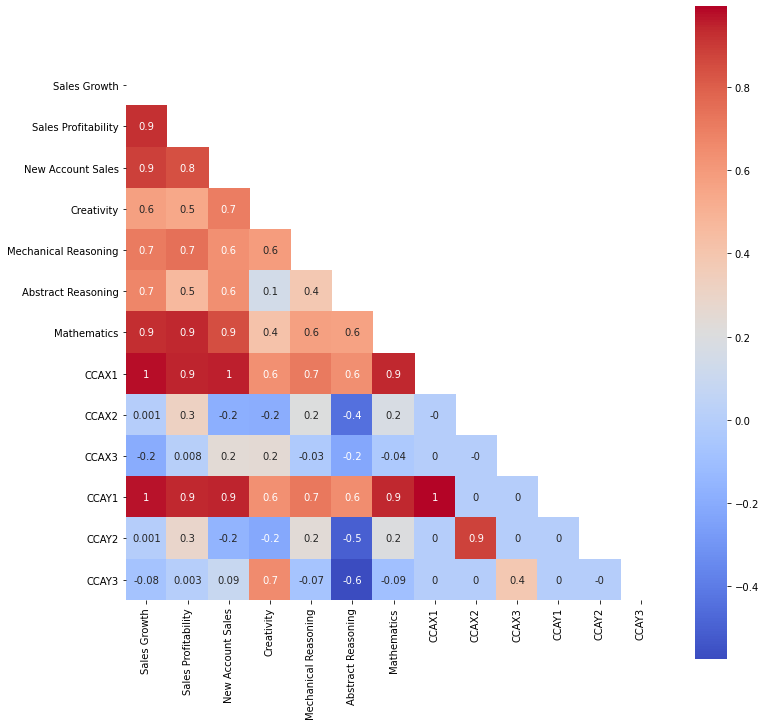

In [19]:
corrCCA = result.corr()
plotHeat(corrCCA,12)

In [20]:
dataCCAX = {
    'CCAX1':X_c[:,0],
    'CCAX2':X_c[:,1],
    'CCAX3':X_c[:,2],
}
CCAX = pd.DataFrame(dataCCAX)
CCAX = pd.concat([Xdf_n, CCAX], axis=1, join='inner')
CCAX.head()

,Sales Growth,Sales Profitability,New Account Sales,CCAX1,CCAX2,CCAX3
0,-0.795383,-1.049157,-1.063194,-1.564050,-0.126088,-0.258003
1,-1.367797,-1.464000,-1.275408,-2.248601,-0.142776,-0.016859
2,-0.522805,-0.624437,-0.808536,-1.071002,0.015345,-0.210480
3,0.335816,-0.278735,0.846735,0.653156,-0.716058,0.097064
4,0.431219,0.116354,0.040321,0.379167,-0.107791,-0.314408


In [21]:
dataCCAY = {
    'CCAY1':Y_c[:,0],
    'CCAY2':Y_c[:,1],
    'CCAY3':Y_c[:,2],
}
CCAY = pd.DataFrame(dataCCAY)
CCAY = pd.concat([Ydf_n, CCAY], axis=1, join='inner')
CCAY.head()

,Creativity,Mechanical Reasoning,Abstract Reasoning,Mathematics,CCAY1,CCAY2,CCAY3
0,-0.562004,-0.644060,-0.729103,-0.926198,-1.300810,0.057473,0.073860
1,-1.068314,-1.234940,-0.261729,-1.400684,-1.867894,-0.467861,-0.381901
2,-0.815159,-0.644060,-0.729103,-0.356814,-0.891390,0.427240,-0.075112
3,0.450616,-0.053179,0.673018,-0.072122,0.267683,-0.702360,0.043591
4,-0.308849,0.242261,0.673018,0.212570,0.280126,-0.098625,-0.663571


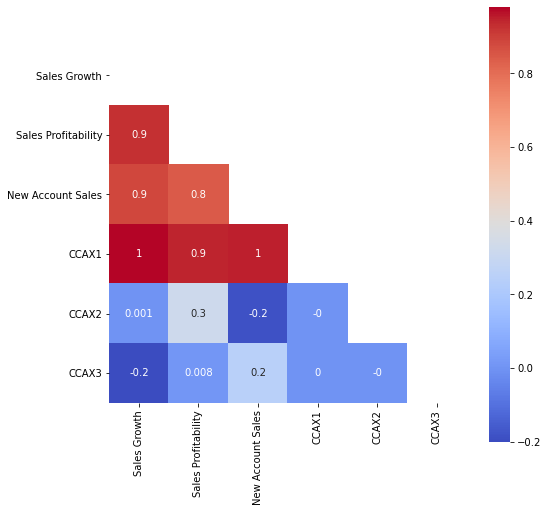

In [22]:
corrX = CCAX.corr()
plotHeat(corrX)

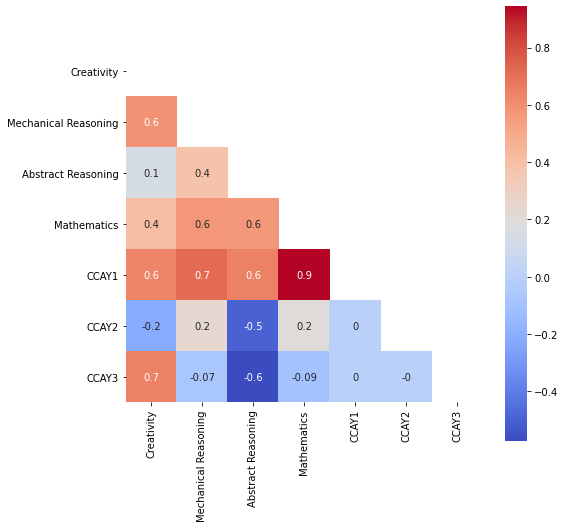

In [23]:
corrY = CCAY.corr()
plotHeat(corrY)

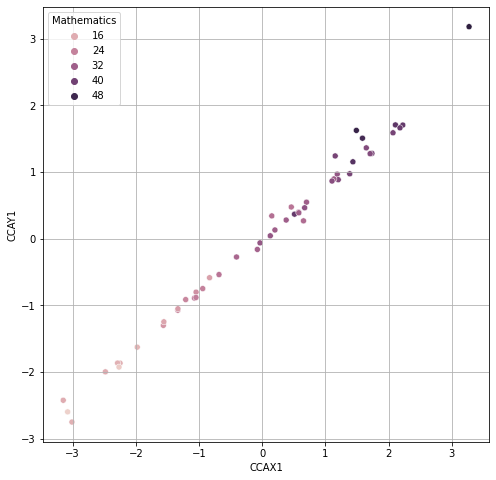

In [24]:
plt.figure(figsize=[8,8])
sns.scatterplot(x="CCAX1",y="CCAY1", hue="Mathematics", data=result)
plt.grid()
plt.show()

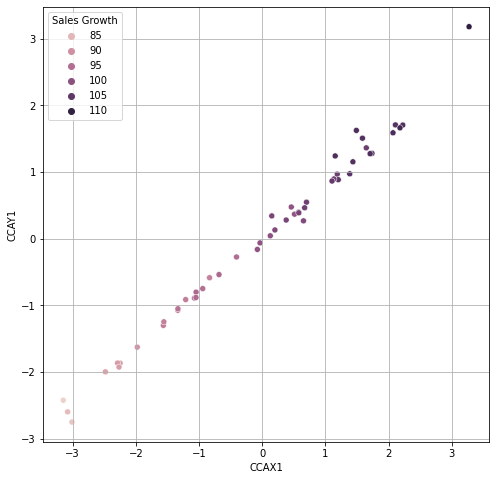

In [25]:
plt.figure(figsize=[8,8])
sns.scatterplot(x="CCAX1",y="CCAY1", hue="Sales Growth", data=result)
plt.grid()
plt.show()

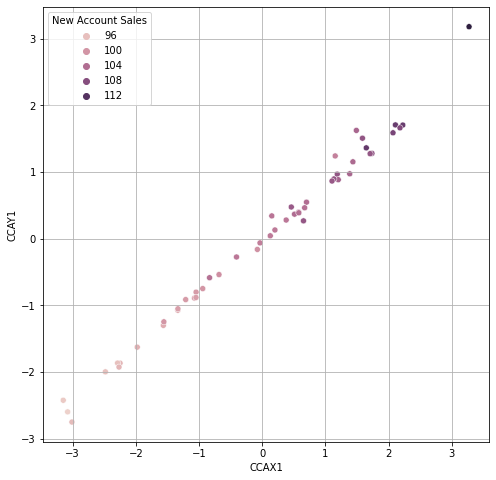

In [26]:
plt.figure(figsize=[8,8])
sns.scatterplot(x="CCAX1",y="CCAY1", hue="New Account Sales", data=result)
plt.grid()
plt.show()

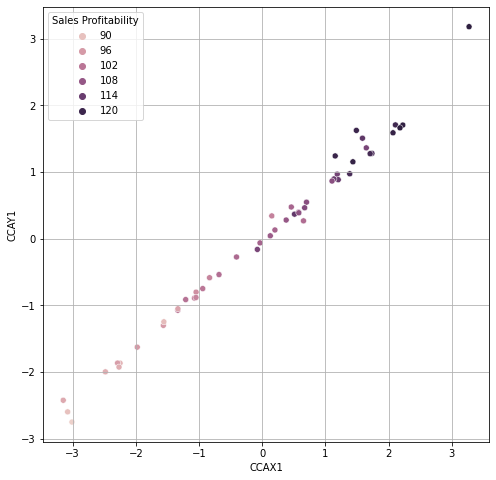

In [27]:
plt.figure(figsize=[8,8])
sns.scatterplot(x="CCAX1",y="CCAY1", hue="Sales Profitability", data=result)
plt.grid()
plt.show()